# **Proyecto Final Algoritmos**

**Integrantes**

*   Mateo Herrera Muñoz
*   Mateo Diaz Muñoz
*   Mateo Andrés Vivas Acosta
*   Andrés Leonardo Leguizamón


Empezamos importando la librería *pandas*



In [ ]:
import pandas as pd
import time

Definimos nuestra fuente de información:

In [ ]:
url_data_time = 'https://co.mejoresrutas.com/tabla-de-distancias-entre-ciudades/co.csv?measure=time&type=road'
url_data_distance = 'https://co.mejoresrutas.com/tabla-de-distancias-entre-ciudades/co.csv?measure=metric&type=road'

Definimos un DataFrame que contendrá el archivo CSV ***url_data_time*** y definimos el índice de este DF a la primera columna.

In [ ]:
df_time = pd.read_csv(url_data_time, index_col=0)

Definimos i como el índice sobre el DataFrame df_time y eliminamos los índices que no nos sirven (los últimos 3)

In [ ]:
i = df_time.index
i_l = list(i)
df_time = df_time.drop(labels=[i_l[15], i_l[16], i_l[17]], axis=0)
df_time

,Bogotá,Cali,Medellín,Barranquilla,Cartagena,Cúcuta,Bucaramanga,Pereira,Santa Marta,Ibagué,Pasto,Manizales,Neiva,Villavicencio,Armenia
Tiempo de conducción,,,,,,,,,,,,,,,
Bogotá,NaN,6:27,5:45,12:04,13:34,7:18,5:05,4:42,11:30,2:39,11:02,4:18,3:49,1:28,4:08
Cali,6:27,NaN,5:43,14:23,13:54,12:25,10:10,2:39,15:07,3:54,7:06,3:20,6:25,7:41,2:22
Medellín,5:43,5:45,NaN,8:41,8:12,7:53,5:38,3:09,9:46,5:19,12:38,2:57,7:50,7:11,3:49
Barranquilla,12:02,14:15,8:32,NaN,1:53,8:51,7:55,11:40,1:15,11:53,21:09,11:28,14:09,13:30,12:20
Cartagena,13:43,13:53,8:10,1:50,NaN,10:31,9:36,11:17,3:04,13:27,20:46,11:05,15:50,15:11,11:57
Cúcuta,7:14,12:26,7:43,8:51,10:23,NaN,2:17,9:50,8:17,8:37,18:07,9:08,10:54,8:42,10:11
Bucaramanga,5:01,10:12,5:30,7:56,9:29,2:18,NaN,7:36,7:22,6:24,15:53,6:54,8:40,6:29,7:57
Pereira,4:44,2:40,3:09,11:50,11:20,9:52,7:37,NaN,12:33,2:11,9:33,0:47,4:43,5:58,0:42
Santa Marta,11:28,15:07,9:37,1:14,3:06,8:16,7:21,12:31,NaN,11:18,20:48,11:49,13:35,12:56,12:52


Hacemos lo propio con el archivo ***url_data_distance***

In [ ]:
df_dist = pd.read_csv(url_data_distance, index_col=0)
i = df_dist.index
i_l = list(i)
df_dist = df_dist.drop(labels=[i_l[15], i_l[16], i_l[17]], axis=0)

df_dist

,Bogotá,Cali,Medellín,Barranquilla,Cartagena,Cúcuta,Bucaramanga,Pereira,Santa Marta,Ibagué,Pasto,Manizales,Neiva,Villavicencio,Armenia
Distancia (kilómetros),,,,,,,,,,,,,,,
Bogotá,NaN,463.0,419.0,1009.0,1052.0,599.0,409.0,322.0,968.0,193.0,764.0,317.0,301.0,110.0,275.0
Cali,461.0,NaN,440.0,1144.0,1098.0,984.0,785.0,215.0,1231.0,274.0,393.0,268.0,382.0,558.0,187.0
Medellín,419.0,439.0,NaN,704.0,659.0,592.0,392.0,224.0,795.0,361.0,816.0,209.0,590.0,529.0,280.0
Barranquilla,1006.0,1139.0,702.0,NaN,122.0,669.0,642.0,924.0,102.0,991.0,1517.0,910.0,1178.0,1117.0,980.0
Cartagena,1078.0,1094.0,656.0,124.0,NaN,740.0,713.0,879.0,225.0,1015.0,1471.0,864.0,1249.0,1188.0,934.0
Cúcuta,596.0,982.0,590.0,669.0,741.0,NaN,200.0,767.0,628.0,705.0,1354.0,718.0,891.0,706.0,789.0
Bucaramanga,407.0,783.0,391.0,643.0,715.0,201.0,NaN,568.0,602.0,506.0,1155.0,519.0,692.0,517.0,590.0
Pereira,321.0,216.0,226.0,930.0,884.0,770.0,570.0,NaN,1017.0,134.0,593.0,54.0,336.0,418.0,53.0
Santa Marta,966.0,1229.0,793.0,101.0,223.0,629.0,602.0,1014.0,NaN,951.0,1600.0,964.0,1138.0,1077.0,1035.0


# Grafo



Importamos la librerìa networkx y scipy

In [ ]:
import networkx as nx
import scipy as sp

Definimos nuestra función que convertirá el tiempo a un valor numérico en minutos.

In [ ]:
def t_to_d(t):
    h, m = t.split(':')
    result = int(h) * 60 + int(m)
    return result

Creamos el grafo G que será un grafo dirigido

In [ ]:
G = nx.DiGraph()

Creamos dos arreglos con los vertices tanto para la distancia como para el tiempo.

In [ ]:
dist_edges = []
time_edges = []

En la variable *cities* guardamos la lista de columnas del dataframe con las distancias, luego, recorremos el arreglo doblemente, ya que los encabezados son iguales tanto para las columnas como para las filas. Dentro de este bucle anidado, añadimos en cada iteración una tupla, siendo i la ciudad de origen, j la ciudad de destino y un objeto conteniendo los valores de distancia para *dist_edges* y tiempo para *time_edges*

In [ ]:
cities = list(df_dist.columns)
for i in cities:
    for j in cities:
        if i != j:
            dist_edges.append((j, i, {'dist': int(df_dist[i][j])}))
            time_edges.append((j, i, {'time': t_to_d(df_time[i][j])}))

In [ ]:
time_edges

[('Cali', 'Bogotá', {'time': 387}),
 ('Medellín', 'Bogotá', {'time': 343}),
 ('Barranquilla', 'Bogotá', {'time': 722}),
 ('Cartagena', 'Bogotá', {'time': 823}),
 ('Cúcuta', 'Bogotá', {'time': 434}),
 ('Bucaramanga', 'Bogotá', {'time': 301}),
 ('Pereira', 'Bogotá', {'time': 284}),
 ('Santa Marta', 'Bogotá', {'time': 688}),
 ('Ibagué', 'Bogotá', {'time': 160}),
 ('Pasto', 'Bogotá', {'time': 662}),
 ('Manizales', 'Bogotá', {'time': 257}),
 ('Neiva', 'Bogotá', {'time': 233}),
 ('Villavicencio', 'Bogotá', {'time': 87}),
 ('Armenia', 'Bogotá', {'time': 250}),
 ('Bogotá', 'Cali', {'time': 387}),
 ('Medellín', 'Cali', {'time': 345}),
 ('Barranquilla', 'Cali', {'time': 855}),
 ('Cartagena', 'Cali', {'time': 833}),
 ('Cúcuta', 'Cali', {'time': 746}),
 ('Bucaramanga', 'Cali', {'time': 612}),
 ('Pereira', 'Cali', {'time': 160}),
 ('Santa Marta', 'Cali', {'time': 907}),
 ('Ibagué', 'Cali', {'time': 235}),
 ('Pasto', 'Cali', {'time': 425}),
 ('Manizales', 'Cali', {'time': 202}),
 ('Neiva', 'Cali', {

Una vez tenemos los arreglos con las distancias y los tiempos, procedemos a añadir los vertices al grafo, lo que nos dará el grafo en cuestión.

In [ ]:
G.add_edges_from(dist_edges)
G.add_edges_from(time_edges)

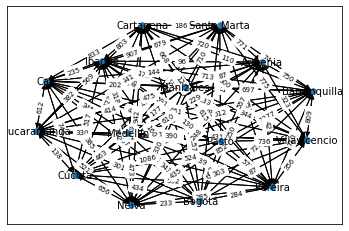

In [ ]:
import matplotlib.pyplot as plt

plot = nx.spring_layout(G)

nx.draw_networkx(G,plot,node_size=30, font_size=10)
labels = nx.get_edge_attributes(G,'time')
nx.draw_networkx_edge_labels(G,plot,edge_labels=labels, font_size=7)
plt.show()

Y para la distancia

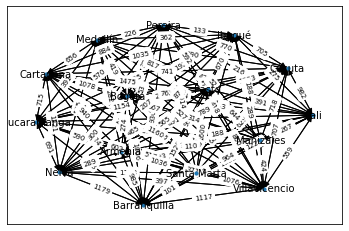

In [ ]:
plot = nx.spring_layout(G)

nx.draw_networkx(G,plot,node_size=10, font_size=10)
labels = nx.get_edge_attributes(G,'dist')
nx.draw_networkx_edge_labels(G,plot,edge_labels=labels, font_size=7)
plt.show()

Una vez el grafo ha sido generado, podemos comprobar su matriz de adyacencia como en el CSV.

In [ ]:
A = nx.adjacency_matrix(G)
A.todense()

matrix([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]], dtype=int64)

Asimismo podemos ver cuál es el recorrido de este grafo.

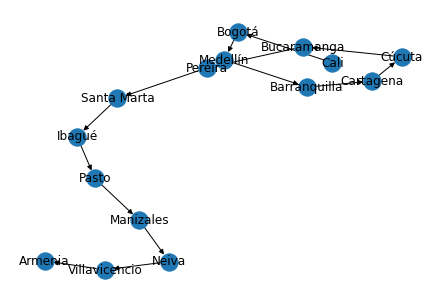

In [ ]:
g = nx.path_graph(G, create_using=nx.DiGraph())
nx.draw(g, with_labels = True)

# Algoritmo de optimización

Usaremos Dijkstra en nuestra implementación.

In [ ]:
#st = nodo inicio
#end = nodo final
#mode = 'dist' o 'time'
#method = 'dijkstra' o ‘bellman-ford'
def nx_algorithms(st, end, mode, method):
    if mode == 'dist' or mode == 'time':
        if i_l.index(st) and i_l.index(end):
            time1 = time.time()
            path = nx.shortest_path(G, source=st, target=end, weight=mode, method=method)
            time2 = time.time()-time1  

            data = 0
            if len(path) < 3:
                data = G.get_edge_data(i_l[0], i_l[1])[mode]
                
            else:
                for i in range(0, len(path)-1):
                    data += G.get_edge_data(i_l[i], i_l[i+1])[mode]

            if mode == 'time':
                m = str(data%60)
                h = str(int(data/60))
                data = h+":"+m

            return (path, data, time2)

El camino más corto desde Barranquilla a todos los otros puntos.

In [ ]:
path = nx.shortest_path(G, source="Barranquilla", weight="dist", )
path

{'Armenia': ['Barranquilla', 'Pereira', 'Armenia'],
 'Barranquilla': ['Barranquilla'],
 'Bogotá': ['Barranquilla', 'Bogotá'],
 'Bucaramanga': ['Barranquilla', 'Bucaramanga'],
 'Cali': ['Barranquilla', 'Cali'],
 'Cartagena': ['Barranquilla', 'Cartagena'],
 'Cúcuta': ['Barranquilla', 'Cúcuta'],
 'Ibagué': ['Barranquilla', 'Ibagué'],
 'Manizales': ['Barranquilla', 'Manizales'],
 'Medellín': ['Barranquilla', 'Medellín'],
 'Neiva': ['Barranquilla', 'Neiva'],
 'Pasto': ['Barranquilla', 'Pasto'],
 'Pereira': ['Barranquilla', 'Pereira'],
 'Santa Marta': ['Barranquilla', 'Santa Marta'],
 'Villavicencio': ['Barranquilla', 'Bogotá', 'Villavicencio']}

Algoritmo Dijkstra implementado por NetworkX para el problema Bucaramanga -> Pasto

In [ ]:
p, d, t_nxd_d = nx_algorithms('Bucaramanga', 'Pasto', 'dist', 'dijkstra')
print('Path: ', p, 'Distancia: ', d, 'Tiempo ejecución: ', t_nxd_d)
p, d, t_nxd_t = nx_algorithms('Bucaramanga', 'Pasto', 'time', 'dijkstra')
print('Path: ', p, 'Distancia: ', d, 'Tiempo ejecución: ', t_nxd_t)

#El resultado tiene un formato 'path, data(tiempo o distancia), tiempo de ejecución'

Path:  ['Bucaramanga', 'Pasto'] Distancia:  463 Tiempo ejecución:  0.0002758502960205078
Path:  ['Bucaramanga', 'Pasto'] Distancia:  6:27 Tiempo ejecución:  0.00034308433532714844


Ahora usaremos el algoritmo bellman ford implementado en networkx

In [ ]:
p, d, t_nxb_d =nx_algorithms('Bucaramanga', 'Pasto', 'dist', 'bellman-ford')
print('Distancia: ', d)
p, d, t_nxd_t =nx_algorithms('Bucaramanga', 'Pasto', 'time', 'bellman-ford')
print('Tiempo: ', t)

Y para el tiempo

In [23]:
path = nx.shortest_path(G, source="Bucaramanga", target="Pasto", weight="time")
path

['Bucaramanga', 'Pasto']

Implementación del código usando la librería nx y una implementación de Dijkstra.

In [21]:
from math import inf
from queue import PriorityQueue
import time

def nx_dijkstra(graph: 'nx.classes.graph.Graph', start: str, end: str, mode: str) -> 'List':
    current_time = time.time()
    def goingBack(prev, start, end): #O(n)
        node = end
        path = []
        while node != start:
            path.append(node)
            node = prev[node]
        path.append(node) 
        path.reverse()
        return path
        
    #Get the weight of the vertex
    def weight(u, v):
        return graph.get_edge_data(u,v).get(mode)
        
    # What is the predecessor of the current node
    prev = {}

    # Initialize an array with infinity to all other nodes in graph
    dist = {v: inf for v in list(nx.nodes(graph))}

    # nodes we've visited
    visited = set()

    #Prioritize the next adjacent nodes with the shortest distance
    pq = PriorityQueue()  
    
    #Distance from one node to itself is zero
    dist[start] = 0

    #First distance in queue
    pq.put((dist[start], start))
    
    #We start looping until queue is empty
    while 0 != pq.qsize():
        curr_weight, curr = pq.get()
        visited.add(curr)
        print(f'visiting {curr}')
        print(f'distance {curr_weight}')
        # look at curr's adjacent nodes
        for neighbor in dict(graph.adjacency()).get(curr):
            # if we found a shorter path 
            path = dist[curr] + weight(curr, neighbor)
            if path < dist[neighbor]:
                # Update the distance as we found a shorter one
                dist[neighbor] = path
                # Update the previous node to be the current one
                prev[neighbor] = curr
                # If next neighbor has not been visited
                if neighbor not in visited:
                    # Insert into pq and mark as visited
                    visited.add(neighbor)
                    pq.put((dist[neighbor],neighbor))
                # Otherwise, update the value in the pq
                else:
                    # Remove old neighbor
                    _ = pq.get((dist[neighbor],neighbor))
                    # Insert new neighbor
                    pq.put((dist[neighbor],neighbor))
    print(time.time()-current_time)            
    return goingBack(prev, start, end), dist[end]



Así, para el tiempo:

In [22]:
path = nx_dijkstra(G, "Bucaramanga", "Pasto", "time")
path

visiting Bucaramanga
distance 0
visiting Cúcuta
distance 137
visiting Bogotá
distance 305
visiting Medellín
distance 338
visiting Ibagué
distance 382
visiting Villavicencio
distance 390
visiting Manizales
distance 414
visiting Santa Marta
distance 441
visiting Pereira
distance 457
visiting Armenia
distance 475
visiting Barranquilla
distance 475
visiting Neiva
distance 521
visiting Cartagena
distance 576
visiting Cali
distance 610
visiting Pasto
distance 951
0.0008118152618408203


(['Bucaramanga', 'Pasto'], 951)

Y para la distancia:

In [ ]:
path = nx_dijkstra(G, "Bucaramanga", "Pasto", "dist")
path

# Tiempos de ejecución